In [ ]:
# Run this cell to configure the Google Colab runtime

import os
try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir(next((root for root, _, files in os.walk(".") if "dsait4090_project_location" in files), "."))
    print(f'Google Colab: {os.getcwd()}')
except ImportError:
    print(f'Local: {os.getcwd()}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Colab: /content/drive/Othercomputers/macbook_pro/fact-checking


In [2]:
%load_ext autoreload
%autoreload

from src.common import get_device, read_data, DATA_PATH, MODELS_PATH
from src.quantemp_processor import QuantempProcessor, QT_VERACITY_LABELS
from src.models.gpt2 import Gpt2Tokenizer, Gpt2Classifier
from src.classification_training import ClassificationTraining

import torch
import logging
from torch import nn

# os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

logging.basicConfig(level=logging.ERROR)

device = get_device()

MPS: 1


In [3]:
DECOMPOSITION = 'gpt3.5-turbo'

train_data = read_data(f'{DECOMPOSITION}/train_evidences_decomposed_{DECOMPOSITION}.json')
val_data = read_data(f'{DECOMPOSITION}/val_evidences_decomposed_{DECOMPOSITION}.json')
test_data = read_data(f'{DECOMPOSITION}/test_evidences_decomposed_{DECOMPOSITION}.json')

# limit = 20
# train_data = train_data[:limit]
# val_data = val_data[:limit]

In [7]:
%autoreload

tokenizer = Gpt2Tokenizer()
data_processor = QuantempProcessor(tokenizer, evidence_mode='decomposition')

train_dataset = data_processor.transform(train_data)
val_dataset = data_processor.transform(val_data)
test_dataset = data_processor.transform(test_data)

  0%|          | 0/9935 [00:00<?, ?it/s]

  0%|          | 0/3084 [00:00<?, ?it/s]

  0%|          | 0/2495 [00:00<?, ?it/s]

In [ ]:
%autoreload

model = Gpt2Classifier("gpt2", len(QT_VERACITY_LABELS), mlp_dim=1024, dropout=0.1).to(device)

In [ ]:
%autoreload

training = ClassificationTraining(
    model_name="gpt2/basic",
    train_dataset=train_dataset,
    val_dataset=val_dataset,
    model=model,
    optimizer=torch.optim.AdamW(model.parameters(), lr=2e-3, eps=1e-8),
    loss_function=nn.CrossEntropyLoss(),
    batch_size=16,
    device=device,
    random_state=0
)

In [ ]:
%autoreload

training.start_new_training()
# training.resume_training()

Removed: epoch_01
Removed: best_model_01
Starting new training from epoch 1



EPOCH 1


train:   0%|          | 0/621 [00:00<?, ?it/s]

eval:   0%|          | 0/193 [00:00<?, ?it/s]

          loss  | accuracy
  train:  1.013 | 57.53
   eval:  0.973 | 58.19
Saved checkpoint: epoch_01
Saved best model: best_model_01


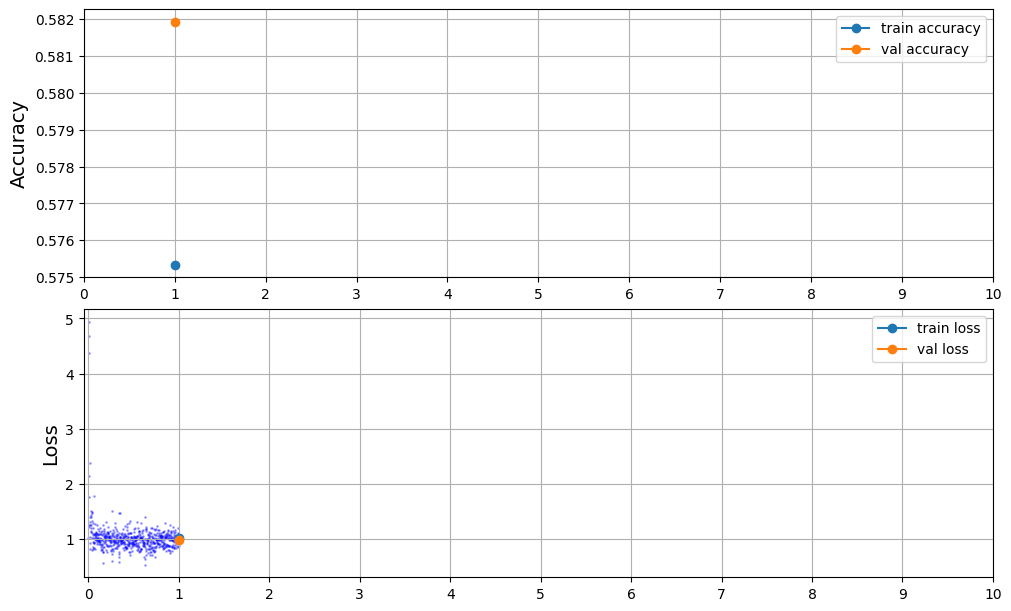


EPOCH 2


train:   0%|          | 0/621 [00:00<?, ?it/s]

eval:   0%|          | 0/193 [00:00<?, ?it/s]

          loss  | accuracy
  train:  0.976 | 58.08
   eval:  0.970 | 58.19
Saved checkpoint: epoch_02
Removed: epoch_01


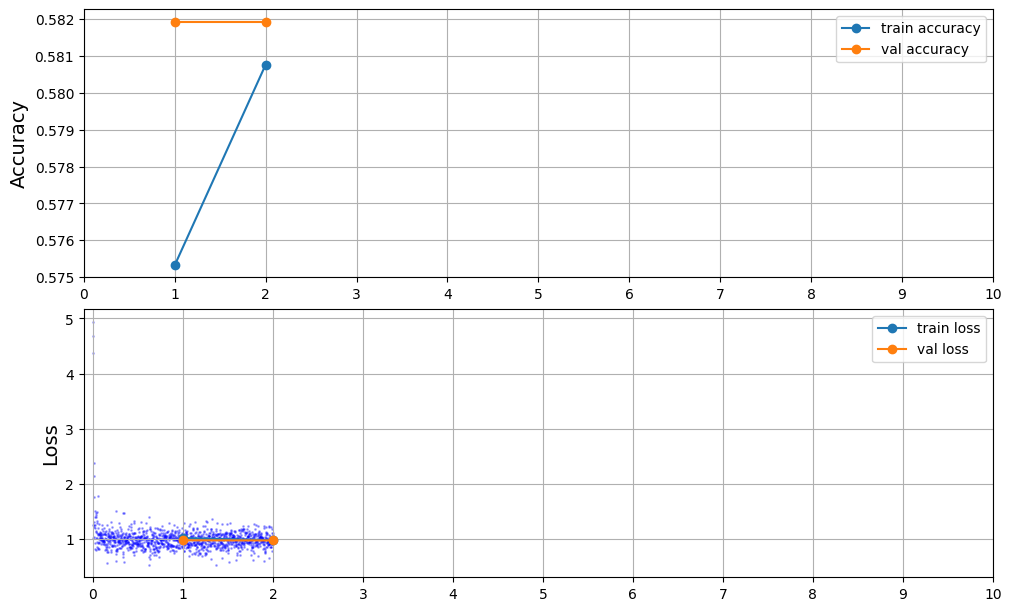


EPOCH 3


train:   0%|          | 0/621 [00:00<?, ?it/s]

eval:   0%|          | 0/193 [00:00<?, ?it/s]

          loss  | accuracy
  train:  0.973 | 58.07
   eval:  0.972 | 58.19
Saved checkpoint: epoch_03
Removed: epoch_02


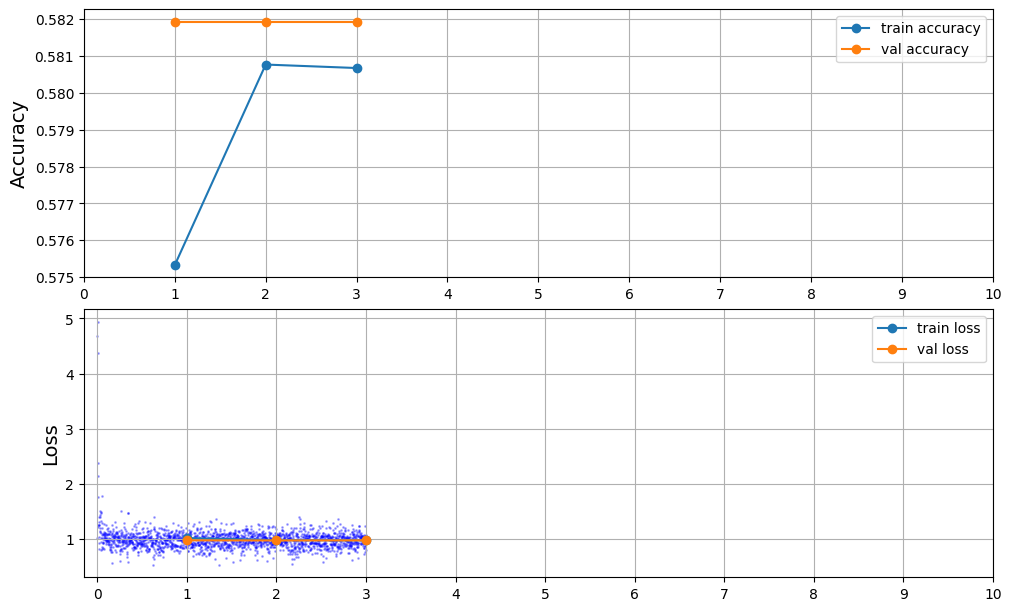


EPOCH 4


train:   0%|          | 0/621 [00:00<?, ?it/s]

eval:   0%|          | 0/193 [00:00<?, ?it/s]

          loss  | accuracy
  train:  0.972 | 58.08
   eval:  0.976 | 58.19
Saved checkpoint: epoch_04
Removed: epoch_03


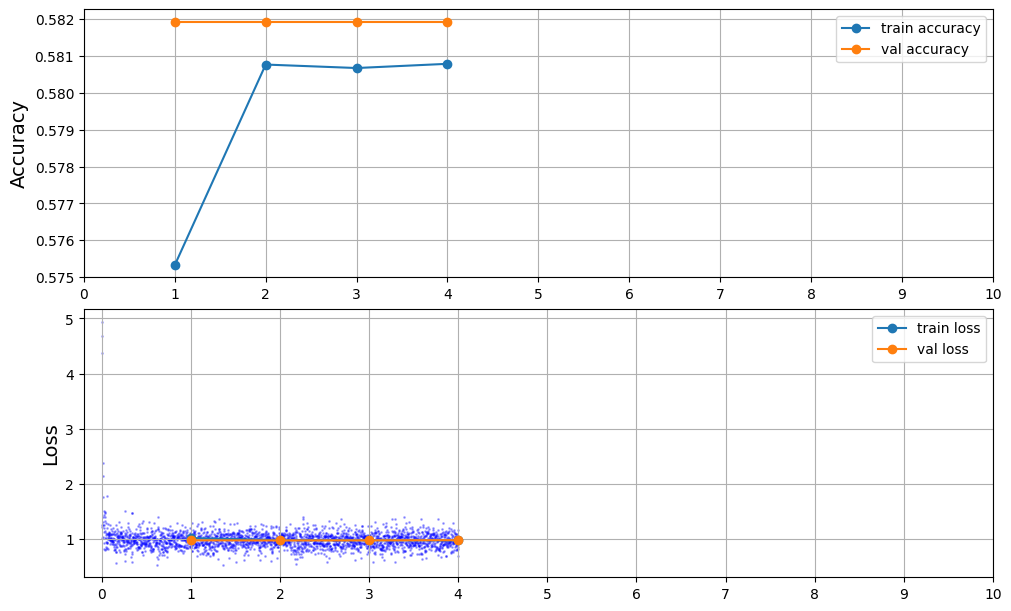


EPOCH 5


train:   0%|          | 0/621 [00:00<?, ?it/s]

eval:   0%|          | 0/193 [00:00<?, ?it/s]

          loss  | accuracy
  train:  0.971 | 58.08
   eval:  0.971 | 58.19
Saved checkpoint: epoch_05
Removed: epoch_04


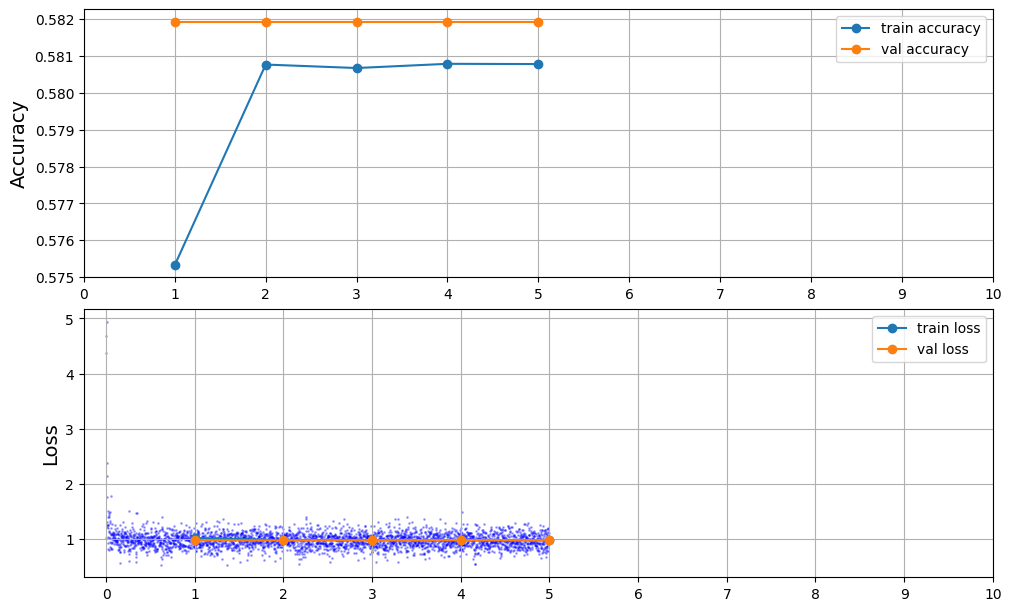

In [ ]:
%autoreload
training.train(epochs=5, patience=None)

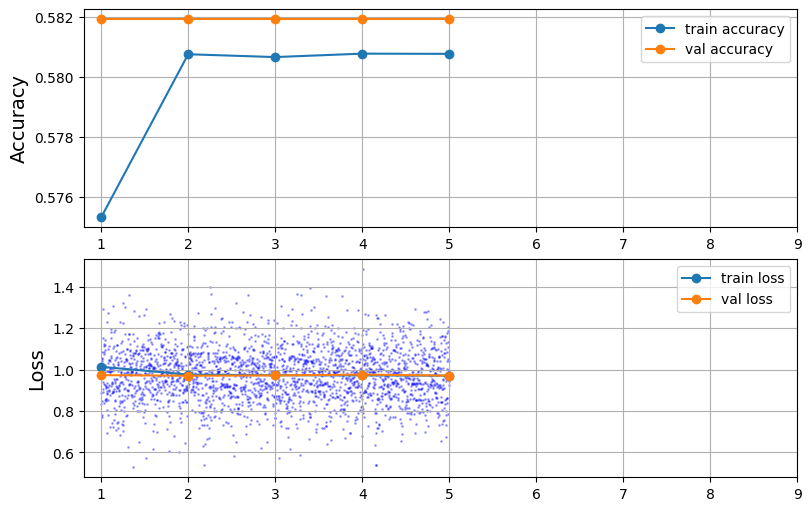

In [28]:
%autoreload
training.plot_stats()